In [1]:
using Pkg
Pkg.activate("../integrate_densities")

using Plots
using ASE
using JuLIP
using Statistics

┌ Info: Precompiling ASE [51974c44-a7ed-5088-b8be-3e78c8ba416c]
└ @ Base loading.jl:1317
┌ Info: Skipping precompilation since __precompile__(false). Importing ASE [51974c44-a7ed-5088-b8be-3e78c8ba416c].
└ @ Base loading.jl:1025


In [2]:
fname="/Users/elena/code/carbyne_comulene/short_example/test_density/HC30H.triplet_opt.uks_def2-svp_opt.uks_cc-pvdz.triplet.eldens.200x50x50.cube"

"/Users/elena/code/carbyne_comulene/short_example/test_density/HC30H.triplet_opt.uks_def2-svp_opt.uks_cc-pvdz.triplet.eldens.200x50x50.cube"

In [3]:
title = split(fname, "/")[end]

"HC30H.triplet_opt.uks_def2-svp_opt.uks_cc-pvdz.triplet.eldens.200x50x50.cube"

In [4]:
"""
reads information from .cube file
"""
function read_file(filename)

    file = readlines(filename)

    # two lines of comments
    # third line: number of atoms (int) and origin (3 x float)
    n_atoms = parse(Int64, split(file[3])[1])
    origin = parse.(Float64, split(file[3])[2:4])

    # fourth-sixth lines - number of voxels along each axis and the axis. 
    # Take only number of voxels (for now?)    
    dens_shape = Tuple([parse(Int64, split(file[i])[1]) for i in 4:6])
    axes = [parse.(Float64, split(file[i])[2:4]) for i in 4:6]

    # `n_atoms` of geometry data
    numbers = [parse(Int64, split(file[i])[1]) for i in 7:6+n_atoms]
    pos = [parse.(Float64, split(file[i])[3:5]) for i in 7:6+n_atoms]
    atoms = Atoms(X=pos, Z=numbers)

    # density data starts after `n_atoms` lines of geometry data
    flat_values=zeros(0)
    for line in file[7+n_atoms:end]
        numbers = parse.(Float64, split(line))
        append!(flat_values, numbers)
    end

    density = unflatten(flat_values, shape=dens_shape);

    return origin, axes, atoms, density, dens_shape

end

read_file

In [95]:
function unflatten(flat_array; shape=(40, 40, 40))
    return permutedims(reshape(flat_array, reverse(shape)), [3, 2, 1])
end

unflatten (generic function with 1 method)

In [96]:
flat = [111 112 113 121 122 123 211 212 213 221 222 223 ]
matrix_3d = reshape(flat, (3, 2, 2))

3×2×2 Array{Int64, 3}:
[:, :, 1] =
 111  121
 112  122
 113  123

[:, :, 2] =
 211  221
 212  222
 213  223

In [97]:
size(matrix_3d)

(3, 2, 2)

In [98]:
flattened_by_rules = zeros(0)

NX = 3
NY = 2
NZ = 2

for x in 1:NX
    for y in 1:NY
        for z in 1:NZ
            append!(flattened_by_rules, matrix_3d[x, y, z])
        end
    end
end
flattened_by_rules

12-element Vector{Float64}:
 111.0
 211.0
 121.0
 221.0
 112.0
 212.0
 122.0
 222.0
 113.0
 213.0
 123.0
 223.0

In [100]:
out = unflatten(flattened_by_rules; shape=(3, 2, 2))

3×2×2 Array{Float64, 3}:
[:, :, 1] =
 111.0  121.0
 112.0  122.0
 113.0  123.0

[:, :, 2] =
 211.0  221.0
 212.0  222.0
 213.0  223.0

In [102]:
origin, axes, atoms, el_density, dens_shape = read_file(fname);

In [103]:
origin

3-element Vector{Float64}:
 -12.068919
  -7.096564
  -7.278952

In [104]:
axes

3-element Vector{Vector{Float64}}:
 [0.445062, 0.0, 0.0]
 [0.0, 0.287742, 0.0]
 [0.0, 0.0, 0.289311]

In [105]:
dens_shape

(200, 50, 50)

In [106]:
atoms

Atoms{Float64}(StaticArrays.SVector{3, Float64}[[-3.037613, 0.002815, -0.106682], [-0.721786, 0.002572, -0.106234], [1.831385, -0.000366, -0.107649], [-5.068919, -0.002958, -0.105736], [4.182782, -0.002958, -0.105736], [6.694962, -0.001799, -0.102727], [9.069792, -0.003985, -0.110515], [11.556022, -0.007773, -0.12005], [13.949449, -0.011626, -0.127618], [16.415845, -0.015436, -0.13436]  …  [48.013095, -0.058073, -0.216919], [50.479822, -0.061993, -0.224069], [52.873375, -0.065116, -0.230169], [55.359784, -0.066863, -0.234786], [57.734679, -0.067886, -0.238856], [60.246874, -0.071509, -0.245931], [62.598341, -0.080372, -0.258625], [65.151249, -0.08872, -0.269087], [67.467299, -0.096564, -0.278952], [69.498345, -0.096441, -0.278653]], StaticArrays.SVector{3, Float64}[], Float64[], AtomicNumber[<6>, <6>, <6>, <1>, <6>, <6>, <6>, <6>, <6>, <6>  …  <6>, <6>, <6>, <6>, <6>, <6>, <6>, <6>, <6>, <1>], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], Bool[0, 0, 0], nothing, JuLIP.DofManager{Float64}(fa

In [109]:
size(el_density)


(200, 50, 50)

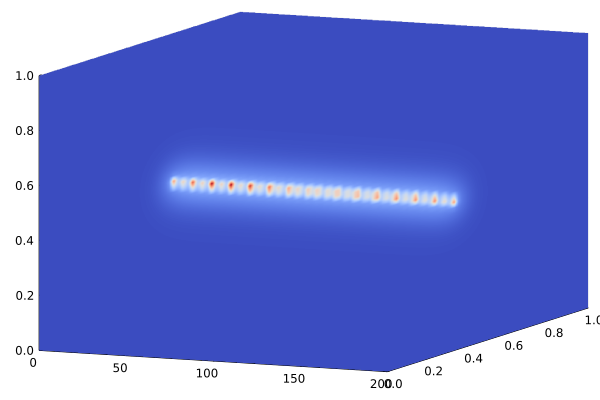

In [110]:
plot(el_density)